### Imports

In [32]:
import tensorflow as tf
import glob
import pathlib
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt

### Load Images as dataset

#### Settings ans checks

In [33]:
data_dir = '../data/images_cropped_sample/'
img_height = 128
img_width = 128
batch_size = 32

In [34]:
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

77


#### View one image

In [1]:
stars = list(data_dir.glob('star/*'))
PIL.Image.open(str(stars[0]))

NameError: name 'data_dir' is not defined

#### DataSets from directory

In [36]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 77 files belonging to 2 classes.
Using 62 files for training.


In [37]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 77 files belonging to 2 classes.
Using 15 files for validation.


In [39]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### Check on classes

In [40]:
print(train_ds.class_names)
print(val_ds.class_names)
class_names = train_ds.class_names

['galaxy', 'star']
['galaxy', 'star']


#### View images

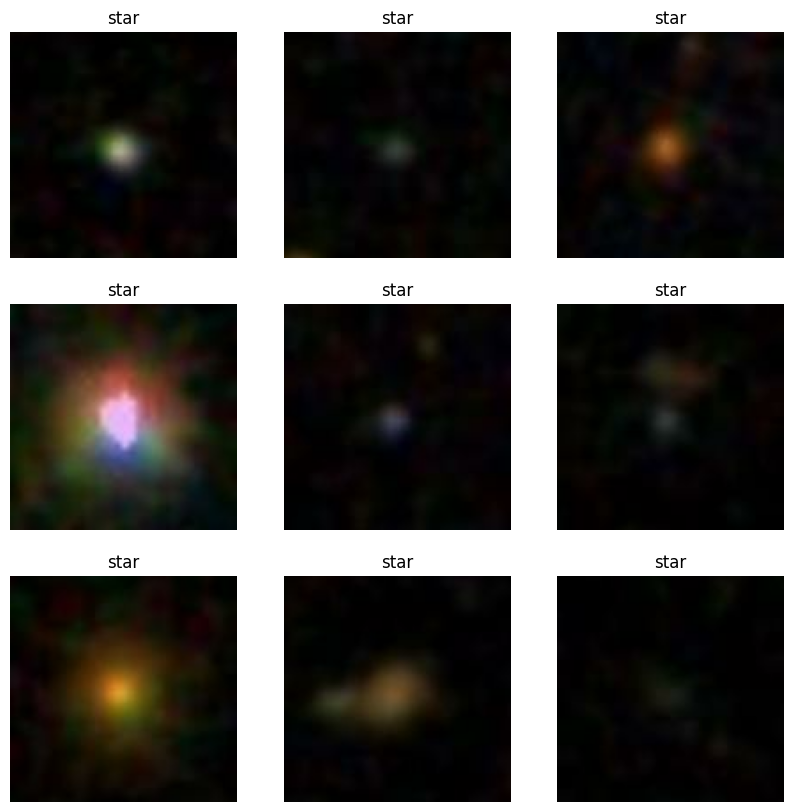

In [41]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Shapes

In [42]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [43]:
first_image = image_batch[0]
print(first_image.shape)
print(np.min(first_image), np.max(first_image))

(128, 128, 3)
0.0 78.0


In [44]:
#normalization_layer = tf.keras.layers.Rescaling(1./255)
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
## Notice the pixel values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image))

In [45]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [46]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [48]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
2/2 [==============================] - 0s 53ms/step - loss: 0.2578 - accuracy: 0.9032 - val_loss: 0.1290 - val_accuracy: 0.9333
Epoch 2/3
2/2 [==============================] - 0s 50ms/step - loss: 0.2083 - accuracy: 0.9032 - val_loss: 0.1188 - val_accuracy: 0.9333
Epoch 3/3
2/2 [==============================] - 0s 52ms/step - loss: 0.1781 - accuracy: 0.9032 - val_loss: 0.1246 - val_accuracy: 0.9333


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9